In [470]:
import re
import os
import time
import nltk
import pickle
import subprocess
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [471]:
from sklearn import tree
from sklearn.svm import SVC
from sklearn import ensemble
from sklearn import set_config
from sklearn import naive_bayes
from sklearn import linear_model
from sklearn import neural_network
from sklearn import gaussian_process
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score

In [472]:
set_config(display='diagram')

In [473]:
pwd

'/Users/assoumerredempta/Documents/aSpring_2023/MS_Final_Project/Experiments'

## Data 

In [474]:
data_ = pickle.load( open( "../data/ExtractedDataSets/allFeatFinal.p", "rb" ) )
data_

,ra_SNTo_C,ra_ONTo_C,ra_XNTo_C,ra_NSTo_C,ra_NOTo_C,ra_NXTo_C,ra_NNTo_C,to_NoPhr_C,as_NoPhr_C,at_NoPhr_C,...,LinseaW_S,query,ratioAbs,ratioConc,numSpellingErrors,offByOne,kidsError,punct,casing,class
3101,0.0,0.0,0.333333,0.0,0.0,0.333333,0.333333,0.0,0.0,0.00,...,0.00,SUNY college population,0.000000,0.666667,1,1,0,0,1,0
4524,0.0,0.0,0.333333,0.0,0.0,0.333333,0.333333,3.0,1.5,0.60,...,0.25,Hfgmhvhjcfhjc facts for kids,0.250000,0.250000,-1,-1,-1,0,1,1
4441,0.0,0.0,0.333333,0.0,0.0,0.000000,0.666667,3.0,1.5,0.75,...,0.00,robots on star wars,0.000000,0.500000,0,0,0,0,0,1
186,0.0,0.0,0.500000,0.0,0.0,0.500000,0.000000,0.0,0.0,0.00,...,-0.25,venture capital,0.500000,0.500000,0,0,0,0,0,0
3552,0.0,0.0,0.500000,0.0,0.0,0.500000,0.000000,0.0,0.0,0.00,...,-0.25,Times Publishing,0.000000,0.000000,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4581,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00,...,-0.25,test again,0.500000,0.500000,0,0,0,0,0,1
3647,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00,...,-0.50,cutterbee,0.000000,0.000000,-1,-1,-1,0,0,0
4229,0.0,0.0,0.500000,0.0,0.0,0.500000,0.000000,0.0,0.0,0.00,...,0.00,fun facts about c3po,0.500000,0.000000,1,1,0,0,0,1
2388,0.0,0.0,0.333333,0.0,0.0,0.000000,0.666667,0.0,0.0,0.00,...,0.00,france 1998 stock market,0.000000,0.500000,0,0,0,0,0,0


In [475]:
data = data_.copy()

In [490]:
data['class'].value_counts(normalize = True)

0    0.800047
1    0.199953
Name: class, dtype: float64

### Drop ``query columns``

In [491]:
data.drop(columns = ['query'], inplace = True, axis=1)

In [492]:
data

,ra_SNTo_C,ra_ONTo_C,ra_XNTo_C,ra_NSTo_C,ra_NOTo_C,ra_NXTo_C,ra_NNTo_C,to_NoPhr_C,as_NoPhr_C,at_NoPhr_C,...,Gunning_S,LinseaW_S,ratioAbs,ratioConc,numSpellingErrors,offByOne,kidsError,punct,casing,class
3101,0.0,0.0,0.333333,0.0,0.0,0.333333,0.333333,0.0,0.0,0.00,...,-0.50,0.00,0.000000,0.666667,1,1,0,0,1,0
4524,0.0,0.0,0.333333,0.0,0.0,0.333333,0.333333,3.0,1.5,0.60,...,-0.25,0.25,0.250000,0.250000,-1,-1,-1,0,1,1
4441,0.0,0.0,0.333333,0.0,0.0,0.000000,0.666667,3.0,1.5,0.75,...,-0.50,0.00,0.000000,0.500000,0,0,0,0,0,1
186,0.0,0.0,0.500000,0.0,0.0,0.500000,0.000000,0.0,0.0,0.00,...,-0.75,-0.25,0.500000,0.500000,0,0,0,0,0,0
3552,0.0,0.0,0.500000,0.0,0.0,0.500000,0.000000,0.0,0.0,0.00,...,-0.75,-0.25,0.000000,0.000000,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4581,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00,...,-0.75,-0.25,0.500000,0.500000,0,0,0,0,0,1
3647,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00,...,-1.00,-0.50,0.000000,0.000000,-1,-1,-1,0,0,0
4229,0.0,0.0,0.500000,0.0,0.0,0.500000,0.000000,0.0,0.0,0.00,...,-0.50,0.00,0.500000,0.000000,1,1,0,0,0,1
2388,0.0,0.0,0.333333,0.0,0.0,0.000000,0.666667,0.0,0.0,0.00,...,-0.50,0.00,0.000000,0.500000,0,0,0,0,0,0


## Data splitting

Train, development, and test set

In [494]:
rng = 52023

In [496]:
X = data.drop("class", axis=1)
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rng, stratify=y)

X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=0.2, random_state=rng, stratify=y_train)


In [497]:
X_train.shape, y_train.shape

((2732, 193), (2732,))

In [498]:
X_dev.shape, y_dev.shape

((684, 193), (684,))

In [499]:
y_dev.value_counts(normalize = True)

0    0.799708
1    0.200292
Name: class, dtype: float64

In [500]:
X_test.shape, y_test.shape

((855, 193), (855,))

## 1. Support Vector Machine (SVM)

In [502]:

svc_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('model', SVC())
])

svc_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC())])

In [503]:
pred_svc = svc_pipeline.predict(X_test)
cm_svm = confusion_matrix(y_true=y_test, y_pred=pred_svc, labels= svc_pipeline.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svc_pipeline.classes_)

In [504]:
FP=cm_svm[0,1]
FN=cm_svm[1,0]
TP=cm_svm[1,1]
TN=cm_svm[0,0]

TPR=TP/(TP+FN)
TNR=TN/(TN+FP)
FPR=FP/(FP+TN)
FNR=FN/(TP+FN)

In [505]:
TPR, TNR, FPR, FNR

(0.38011695906432746,
 0.9605263157894737,
 0.039473684210526314,
 0.6198830409356725)

In [506]:
print(classification_report(y_true=y_test, y_pred=pred_svc,
                            labels= svc_pipeline.classes_, digits=3))

              precision    recall  f1-score   support

           0      0.861     0.961     0.908       684
           1      0.707     0.380     0.494       171

    accuracy                          0.844       855
   macro avg      0.784     0.670     0.701       855
weighted avg      0.830     0.844     0.825       855



### Tune SVM HP

In [540]:
linear_kernel = {
    'model__C': [0.1, 0.5, 1.0, 5, 10], 
    'model__kernel': ['linear']
}

rbf_kernel ={
    'model__C': [0.1, 0.5, 1, 5, 10], 
    'model__kernel': ['rbf'],
    'model__gamma': ['scale', 'auto']
}

poly_kernel ={
    'model__C': [0.1, 0.5, 1, 5, 10], 
    'model__kernel': ['poly'],
    'model__degree': [2,3],
    'model__gamma': ['scale', 'auto']
}


param = [
    linear_kernel,
    rbf_kernel,
    poly_kernel
]


In [541]:
svc_cv = GridSearchCV(estimator=svc_pipeline, param_grid=param, n_jobs=-1, verbose=2)
svc_cv.fit(X_dev, y_dev)


Fitting 5 folds for each of 35 candidates, totalling 175 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC())]),
             n_jobs=-1,
             param_grid=[{'model__C': [0.1, 0.5, 1.0, 5, 10],
                          'model__kernel': ['linear']},
                         {'model__C': [0.1, 0.5, 1, 5, 10],
                          'model__gamma': ['scale', 'auto'],
                          'model__kernel': ['rbf']},
                         {'model__C': [0.1, 0.5, 1, 5, 10],
                          'model__degree': [2, 3],
                          'model__gamma': ['scale', 'auto'],
                          'model__kernel': ['poly']}],
             verbose=2)

In [542]:
svc_cv.best_params_

{'model__C': 0.1, 'model__kernel': 'linear'}

In [510]:
new_ys_pred = svc_cv.best_estimator_.predict(X_test)

In [511]:
print(classification_report(y_true=y_test, y_pred=new_ys_pred, labels= svc_pipeline.classes_))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90       684
           1       0.67      0.38      0.49       171

    accuracy                           0.84       855
   macro avg       0.77      0.67      0.69       855
weighted avg       0.82      0.84      0.82       855



## 2. MLP

In [512]:
%%time
mlp_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('model', MLPClassifier(random_state=42, max_iter=300, validation_fraction = 0.1, verbose = 2))
])
mlp_pipeline.fit(X_train, y_train)

Iteration 1, loss = 0.48424348
Iteration 2, loss = 0.36723593
Iteration 3, loss = 0.33395707
Iteration 4, loss = 0.31871004
Iteration 5, loss = 0.30948692
Iteration 6, loss = 0.30021294
Iteration 7, loss = 0.29344629
Iteration 8, loss = 0.28812057
Iteration 9, loss = 0.28307400
Iteration 10, loss = 0.27713379
Iteration 11, loss = 0.27238998
Iteration 12, loss = 0.26909490
Iteration 13, loss = 0.26444351
Iteration 14, loss = 0.26138454
Iteration 15, loss = 0.25950656
Iteration 16, loss = 0.25486554
Iteration 17, loss = 0.25507699
Iteration 18, loss = 0.24846801
Iteration 19, loss = 0.24696640
Iteration 20, loss = 0.24797483
Iteration 21, loss = 0.24105781
Iteration 22, loss = 0.23922121
Iteration 23, loss = 0.23733788
Iteration 24, loss = 0.23315838
Iteration 25, loss = 0.23320023
Iteration 26, loss = 0.22887475
Iteration 27, loss = 0.22626854
Iteration 28, loss = 0.22100234
Iteration 29, loss = 0.21869547
Iteration 30, loss = 0.21824818
Iteration 31, loss = 0.21336775
Iteration 32, los

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 MLPClassifier(max_iter=300, random_state=42, verbose=2))])

In [513]:
pred_mlp = mlp_pipeline.predict(X_test)
cm_mlp = confusion_matrix(y_true=y_test, y_pred=pred_mlp, labels = mlp_pipeline.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp, display_labels=mlp_pipeline.classes_)

In [514]:
FP=cm_mlp[0,1]
FN=cm_mlp[1,0]
TP=cm_mlp[1,1]
TN=cm_mlp[0,0]

TPR=TP/(TP+FN)
TNR=TN/(TN+FP)
FPR=FP/(FP+TN)
FNR=FN/(TP+FN)

In [515]:
TPR, TNR, FPR, FNR

(0.5380116959064327,
 0.9210526315789473,
 0.07894736842105263,
 0.4619883040935672)

In [516]:
print(classification_report(y_true=y_test, y_pred=pred_mlp,
                            labels= mlp_pipeline.classes_, digits=3))
   

              precision    recall  f1-score   support

           0      0.889     0.921     0.905       684
           1      0.630     0.538     0.580       171

    accuracy                          0.844       855
   macro avg      0.759     0.730     0.742       855
weighted avg      0.837     0.844     0.840       855



### Tune MLP HP

In [517]:
param_grid = {
    'hidden_layer_sizes': [(30,), (50,), (100,), (300,)],
    'activation': ['logistic', 'relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive', 'invscaling']
}

mlp = MLPClassifier(max_iter=1000)

grid_search = GridSearchCV(mlp, param_grid=param_grid, cv=5, verbose=1)

grid_search.fit(X_dev, y_dev)

print("Best hyperparameters:", grid_search.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best hyperparameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (300,), 'learning_rate': 'constant'}


In [518]:
best_mlp = grid_search.best_estimator_
y_pred = best_mlp.predict(X_test)
print("Accuracy:", accuracy)

Accuracy: 0.8113804004214963


## 3. Random Forest (rf)

In [519]:
rfc_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(random_state=42, n_jobs=-1))
])

rfc_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestClassifier(n_jobs=-1, random_state=42))])

In [520]:
pred_rfc = rfc_pipeline.predict(X_test)
cm_rf = confusion_matrix(y_true=y_test, y_pred=pred_rfc, labels= rfc_pipeline.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rfc_pipeline.classes_)

In [521]:
FP=cm_rf[0,1]
FN=cm_rf[1,0]
TP=cm_rf[1,1]
TN=cm_rf[0,0]

TPR=TP/(TP+FN)
TNR=TN/(TN+FP)
FPR=FP/(FP+TN)
FNR=FN/(TP+FN)

In [522]:
TPR, TNR, FPR, FNR

(0.4678362573099415,
 0.966374269005848,
 0.033625730994152045,
 0.5321637426900585)

In [523]:
print(classification_report(y_true=y_test, y_pred=pred_rfc,
                            labels= rfc_pipeline.classes_, digits=3))

              precision    recall  f1-score   support

           0      0.879     0.966     0.921       684
           1      0.777     0.468     0.584       171

    accuracy                          0.867       855
   macro avg      0.828     0.717     0.752       855
weighted avg      0.859     0.867     0.853       855



In [524]:
acc_rfc = accuracy_score(y_test, pred_rfc)
acc_rfc

0.8666666666666667

### Tune RF Hyperparameter

In [525]:
param_spec = {
    'model__n_estimators': [100, 200, 500],
    'model__criterion': ['gini', 'entropy'],
    'model__max_depth': [None, 20],
    'model__min_samples_split': [2, 3, 5], 
    'model__max_features': ['sqrt', 'log2', None] #
}

rf_cv = GridSearchCV(estimator=rfc_pipeline, param_grid=param_spec,
                    n_jobs=-1, verbose=1, refit=True, cv=5)
# for i in tqdm(param_spec):
rf_cv.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': [None, 20],
                         'model__max_features': ['sqrt', 'log2', None],
                         'model__min_samples_split': [2],
                         'model__n_estimators': [100, 200, 500]},
             verbose=1)

In [526]:
rf_cv.best_params_

{'model__criterion': 'entropy',
 'model__max_depth': None,
 'model__max_features': 'sqrt',
 'model__min_samples_split': 2,
 'model__n_estimators': 500}

In [527]:
yt_pred_rf_cv = rf_cv.predict(X_test)
print(classification_report(y_true=y_test, y_pred=yt_pred_rf_cv,
                            labels= svc_pipeline.classes_, digits=3))

              precision    recall  f1-score   support

           0      0.881     0.968     0.923       684
           1      0.788     0.480     0.596       171

    accuracy                          0.870       855
   macro avg      0.835     0.724     0.760       855
weighted avg      0.863     0.870     0.857       855



## Feature importance

In [531]:
X_cols =  X_train.columns
X_scaled=StandardScaler().fit_transform(X_train[X_cols])

In [532]:
model=RandomForestClassifier(random_state=rng, 
                             n_jobs=-1, 
                             n_estimators = 500, 
                             criterion = 'entropy',
                             max_depth = 20,
                             min_samples_split = 2,
                             max_features = 'sqrt'
                             )
# model.fit(X_scaled, data['class'])
                             
model.fit(X_scaled, y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, max_features='sqrt',
                       n_estimators=500, n_jobs=-1, random_state=42)

In [533]:
model.feature_importances_

array([1.16060508e-03, 5.57652078e-05, 4.50231446e-03, 9.86884760e-04,
       3.53420957e-04, 4.94832017e-03, 4.47343578e-03, 1.74873008e-03,
       1.85632407e-03, 3.30778577e-03, 1.98587287e-03, 1.95118924e-03,
       1.71885195e-03, 3.66670044e-04, 3.75043101e-04, 9.92018580e-04,
       9.68414871e-04, 2.28930263e-03, 1.86384062e-03, 9.41680602e-04,
       1.10450588e-03, 2.81633259e-04, 6.22852099e-04, 1.35009191e-03,
       9.52271366e-04, 2.77834212e-03, 1.97934447e-03, 3.10583462e-03,
       3.46895327e-04, 2.65512960e-04, 2.27466520e-04, 1.01753236e-03,
       9.67514944e-04, 1.67668087e-03, 1.80430145e-03, 5.25643362e-04,
       3.47658520e-04, 1.78157332e-04, 1.51542586e-04, 2.45450882e-04,
       2.88620925e-04, 2.94235420e-04, 2.90682849e-04, 2.67634973e-04,
       2.99705999e-04, 1.26267744e-04, 5.67512734e-05, 1.95139869e-04,
       2.05465426e-04, 3.05750631e-04, 2.59373770e-04, 6.37563203e-04,
       2.09428411e-04, 1.85040323e-04, 3.35801636e-05, 2.40461039e-03,
      

In [534]:
FeatImp = pd.Series(model.feature_importances_, index=X_cols).sort_values(ascending=False)
FeatImp.head(40)

at_Chara_C    0.043713
as_Chara_C    0.029596
at_Sylla_C    0.023137
at_SbCDL_C    0.020281
to_AAKuW_C    0.019198
as_SbSBW_C    0.018757
at_AAKuL_C    0.018524
as_AABrL_C    0.018520
at_AAKuW_C    0.018458
as_Sylla_C    0.018134
at_SbFrL_C    0.017925
to_AAKuL_C    0.017762
to_SbSBW_C    0.017604
at_SbSBC_C    0.017588
as_AAKuW_C    0.017566
to_SbFrQ_C    0.016955
as_AACoL_C    0.016690
at_SbCDC_C    0.016631
to_SbFrL_C    0.016621
at_SbSBW_C    0.016563
as_AAKuL_C    0.016405
as_SbFrL_C    0.016344
as_SbFrQ_C    0.016177
to_AABrL_C    0.016113
to_AACoL_C    0.015853
as_SbCDL_C    0.014983
to_SbCDL_C    0.014871
at_SbFrQ_C    0.014769
at_SbL1W_C    0.014079
to_SbSBC_C    0.013380
to_SbCDC_C    0.013357
as_SbCDC_C    0.013290
as_SbL1C_C    0.013262
at_AABrL_C    0.012921
at_SbL1C_C    0.012885
as_SbSBC_C    0.012633
to_SbL1C_C    0.012549
AutoRea_S     0.012263
to_SbL1W_C    0.011970
at_AACoL_C    0.011836
dtype: float64

<AxesSubplot:>

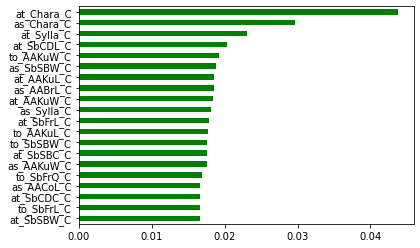

In [535]:
%matplotlib inline

FeatImp.head(20).sort_values().plot.barh(color='green')

In [536]:
FeatImp.tail(40)

ra_SuVeT_C    0.000299
SimpAvV_S     0.000298
at_AjPhr_C    0.000294
ra_AjNoP_C    0.000291
as_AjPhr_C    0.000289
ra_VeAjP_C    0.000282
ra_AvAjT_C    0.000278
ra_AjVeP_C    0.000268
ra_SuAjP_C    0.000266
ra_AvNoP_C    0.000259
as_AvTag_C    0.000256
to_AvTag_C    0.000252
to_AjPhr_C    0.000245
ra_SuAvP_C    0.000227
ra_AvNoT_C    0.000227
ra_AjAvT_C    0.000215
ra_AvSuP_C    0.000209
ra_AvVeT_C    0.000208
ra_VeSuT_C    0.000206
as_AvPhr_C    0.000205
to_AvPhr_C    0.000195
ra_AvPrP_C    0.000185
ra_VeCoT_C    0.000178
ra_PrAjP_C    0.000178
ra_CoVeT_C    0.000172
ra_PrAvP_C    0.000152
ra_NoAvT_C    0.000143
ra_AvSuT_C    0.000142
ra_VeAvT_C    0.000136
ra_AjPrP_C    0.000126
ra_SuAvT_C    0.000123
ra_CoAjT_C    0.000077
ra_AjAvP_C    0.000057
ra_ONTo_C     0.000056
ra_SuCoT_C    0.000041
ra_CoSuT_C    0.000036
ra_AjCoT_C    0.000034
ra_AvAjP_C    0.000034
ra_CoAvT_C    0.000027
ra_AvCoT_C    0.000014
dtype: float64

<AxesSubplot:>

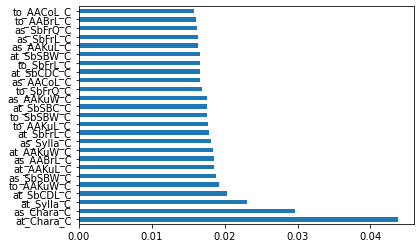

In [537]:
FeatImp[FeatImp > 0.015].plot(kind='barh')

## Polt feature Importance 

We visualize the distribution of feature importance in order to find a threshold of the most important features

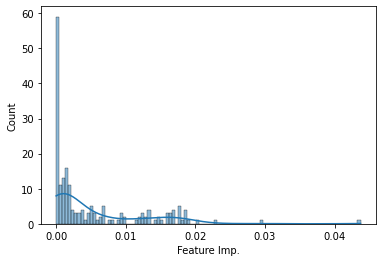

In [538]:
sns.histplot(data = FeatImp, kde = True, bins = 100)
# plt.xlim(xmin=0.00, xmax = 0.05)
plt.xlabel('Feature Imp.')
plt.show()

We can see that the plot is curving at around **0.005**, so we are taking it as our threshold

## Create a df for the important features

This dataframe will used later for selecting trimming the most important features 

In [547]:
FIdf = pd.DataFrame(FeatImp)
FIdf.reset_index(inplace = True)
FIdf = FIdf.rename(columns={'index':'features', 0:'values'})
FIdf

,features,values
0,at_Chara_C,0.043713
1,as_Chara_C,0.029596
2,at_Sylla_C,0.023137
3,at_SbCDL_C,0.020281
4,to_AAKuW_C,0.019198
...,...,...
188,ra_CoSuT_C,0.000036
189,ra_AjCoT_C,0.000034
190,ra_AvAjP_C,0.000034
191,ra_CoAvT_C,0.000027
